# Binary Classification Using a CART Decision Tree

In this activity, we will build a CART Decision Tree-based classifier using the MNIST dataset to classify between two digits: 0 and 1.

In [6]:
import struct
import numpy as np
import pandas as pd
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Load the MNIST data into memory.

In [2]:
with gzip.open('../Datasets/train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

with gzip.open('../Datasets/t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualize a sample of the data.

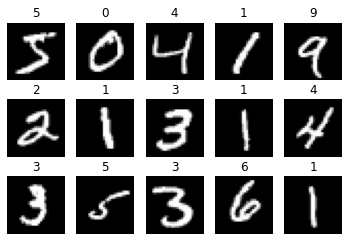

In [5]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(img[i], cmap='gray')
    plt.title(labels[i])
    plt.axis("off")

Construct a CART Decision Tree classifier model to classify the digits 0 and 1. The model we are going to create is to determine whether the samples are either the digits 0 or 1. To do this, we first need to select only those samples.

In [11]:
mask = np.where((labels == 0) | (labels == 1))
img_01 = img[mask]
labels_01 = labels[mask]
mask_test = np.where((labels_test == 0) | (labels_test == 1))
img_test_01 = img_test[mask_test]
labels_test_01 = labels_test[mask_test]

Visualize the selected information with images of one sample of 0 and one sample of 1.

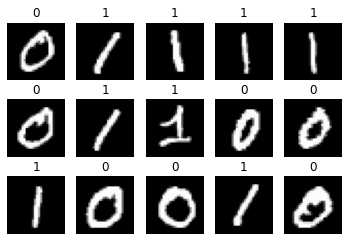

In [12]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(img_01[i], cmap='gray')
    plt.title(labels_01[i])
    plt.axis("off")

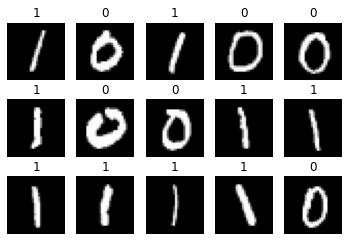

In [13]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(img_test_01[i], cmap='gray')
    plt.title(labels_test_01[i])
    plt.axis("off")

In order to provide the image information to the model, we must first flatten the data out so that each image is 1 x 784 pixels in shape.

In [18]:
X_train = img_01.reshape(-1, rows * cols)
X_test = img_test_01.reshape(-1, rows * cols)
X_train.shape

(12665, 784)

Construct the model; use the DecisionTreeClassifier API and call the fit function.

In [21]:
model = DecisionTreeClassifier(random_state=123)
model.fit(
    X=X_train,
    y=labels_01
)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

Determine the training set accuracy.

In [22]:
# training set performance
model.score(
    X=X_train,
    y=labels_01    
)

1.0

In [23]:
# test set performance
model.score(
    X=X_test,
    y=labels_test_01    
)

0.9962174940898345

In [25]:
model.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)